# Week 11

Context information: The dataset I used is the Statlog Heart Disease dataset from Kaggle, which includes 14 features related to cardiovascular health. The chosen project was based on cardiovascular disease (CVD). This project examines data related to CVD in order to analyze healthcare utilization and risk factors. The dataset, Statlog Heart Disease, included medical attributes from 270 individuals. These included blood pressure, cholesterol, and heart rate, utilizing said data to predict the presence of heart disease. The project strived to discover trends in healthcare to identify key risk factors for cardiovascular disease and thus inform on new strategies for disease prevention and management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
df = pd.read_csv('Heart_disease_statlog.csv')

In [7]:
print("Shape:", df.shape)
display(df.head())
display(df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nColumn names:\n", df.columns)

Shape: (270, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000



Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Column names:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [10]:
X = df.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

DBSCAN Clustering

In [13]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

Computed silhouette

In [16]:
core_mask = dbscan_labels != -1
if core_mask.sum() > 1 and len(np.unique(dbscan_labels[core_mask])) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[core_mask], dbscan_labels[core_mask])
else:
    dbscan_silhouette = None

print("\n--- DBSCAN Results ---")
print(f"Number of clusters (excluding noise): {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")
print(f"Number of noise points: {np.sum(dbscan_labels == -1)}")
print(f"Silhouette Score: {dbscan_silhouette if dbscan_silhouette else 'Not computable'}")


--- DBSCAN Results ---
Number of clusters (excluding noise): 2
Number of noise points: 252
Silhouette Score: 0.6963953539572221


Hierarchical Agglomerative Clustering (HAC) with Ward Linkage

In [19]:
hac = AgglomerativeClustering(n_clusters=3, linkage='ward')
hac_labels = hac.fit_predict(X_scaled)
hac_silhouette = silhouette_score(X_scaled, hac_labels)

print("\n--- HAC Results (Ward linkage) ---")
print(f"Clusters formed: {len(np.unique(hac_labels))}")
print(f"Silhouette Score: {hac_silhouette:.4f}")


--- HAC Results (Ward linkage) ---
Clusters formed: 3
Silhouette Score: 0.1416


HAC with Complete Linkage

In [22]:
hac_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
hac_complete_labels = hac_complete.fit_predict(X_scaled)
hac_complete_silhouette = silhouette_score(X_scaled, hac_complete_labels)

print("\n--- HAC Results (Complete linkage) ---")
print(f"Clusters formed: {len(np.unique(hac_complete_labels))}")
print(f"Silhouette Score: {hac_complete_silhouette:.4f}")


--- HAC Results (Complete linkage) ---
Clusters formed: 3
Silhouette Score: 0.1526


HAC with Average Linkage

In [25]:
hac_average = AgglomerativeClustering(n_clusters=3, linkage='average')
hac_average_labels = hac_average.fit_predict(X_scaled)
hac_average_silhouette = silhouette_score(X_scaled, hac_average_labels)

print("\n--- HAC Results (Average linkage) ---")
print(f"Clusters formed: {len(np.unique(hac_average_labels))}")
print(f"Silhouette Score: {hac_average_silhouette:.4f}")


--- HAC Results (Average linkage) ---
Clusters formed: 3
Silhouette Score: 0.2828


Dendrograms for Visualizing Linkage

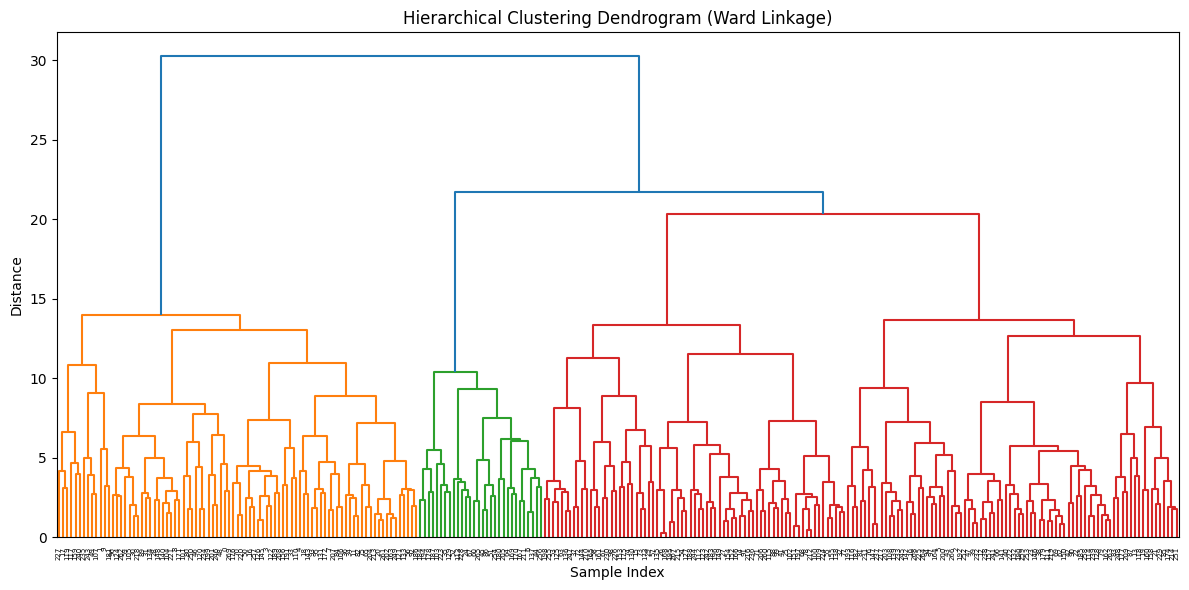

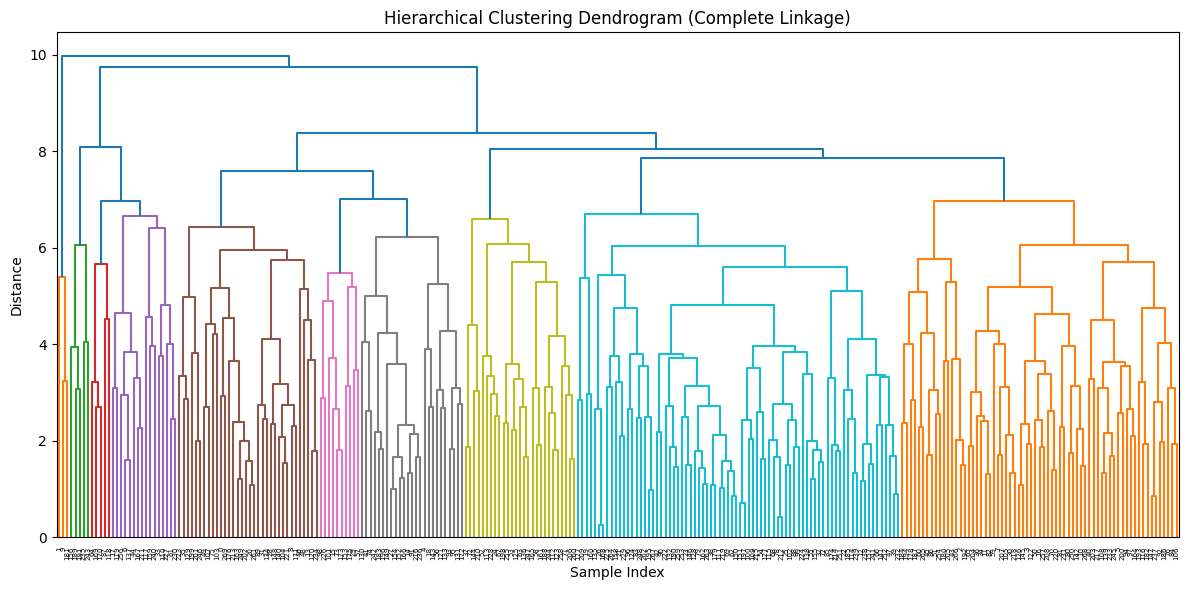

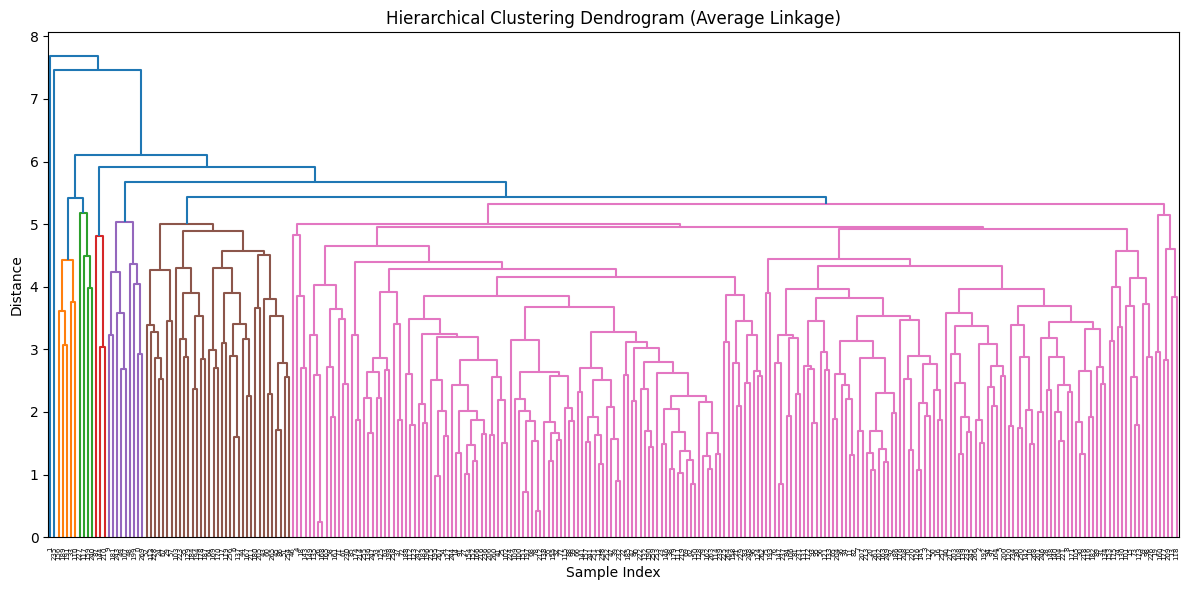

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_methods = ['ward', 'complete', 'average']

for method in linkage_methods:
    plt.figure(figsize=(12, 6))
    linked = linkage(X_scaled, method=method)
    dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()